In [10]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
from numpy import linalg as LA


In [11]:
plt.rcParams.update({
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14
})

In [12]:
source_file = '../data/gear_pde_mixed_1.h5'

In [13]:
with h5.File(source_file, 'r') as data:
    positions = data['pos'][:]
    disp = data['u'][:]
    stress = data['stress'][:]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../data/gear_pde_mixed_1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

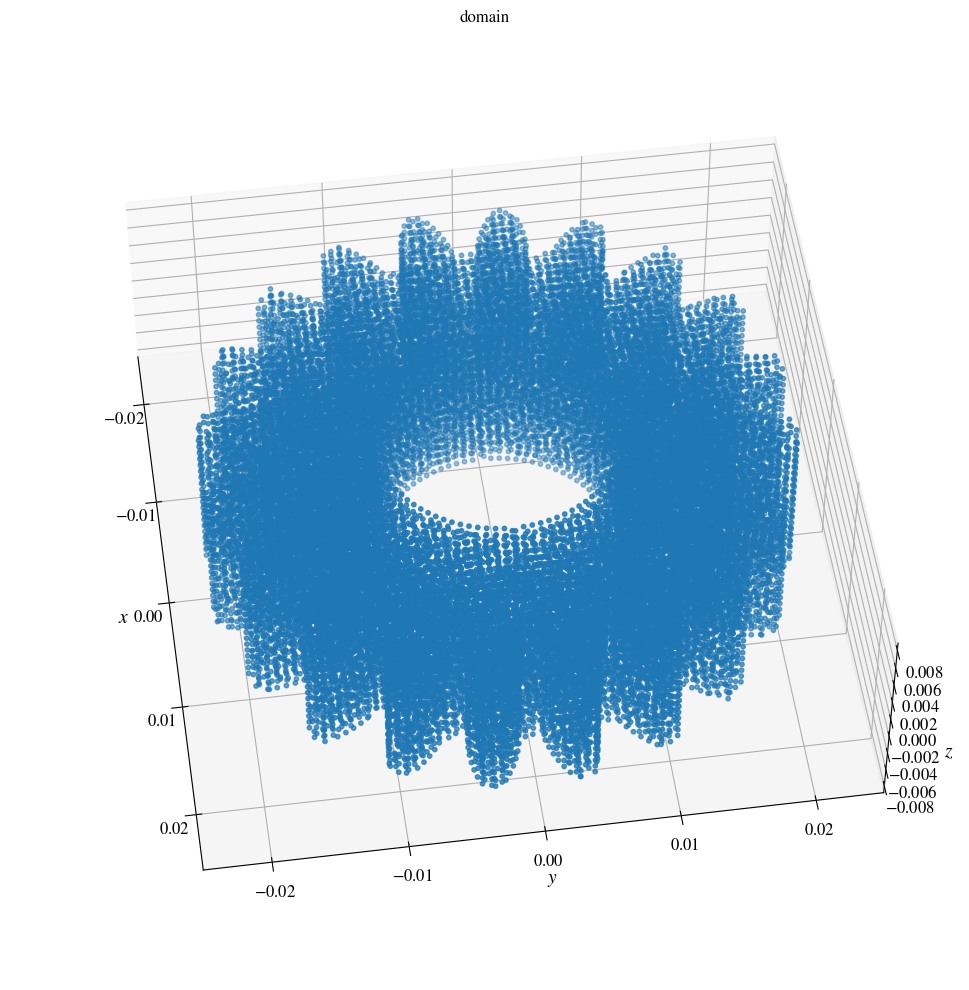

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(positions[0], positions[1], positions[2], s=10)

# Meta.
ax.set_box_aspect((np.ptp(positions[0]), np.ptp(positions[1]), np.ptp(positions[2])))
ax.view_init(elev=50, azim=-8)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('domain')

fig.tight_layout()

In [ ]:
disp_mag = np.array([LA.norm(disp[:, i], 2) for i in range(len(disp[0]))])

In [ ]:
disp_mag

array([nan, nan, nan, ..., nan, nan, nan])

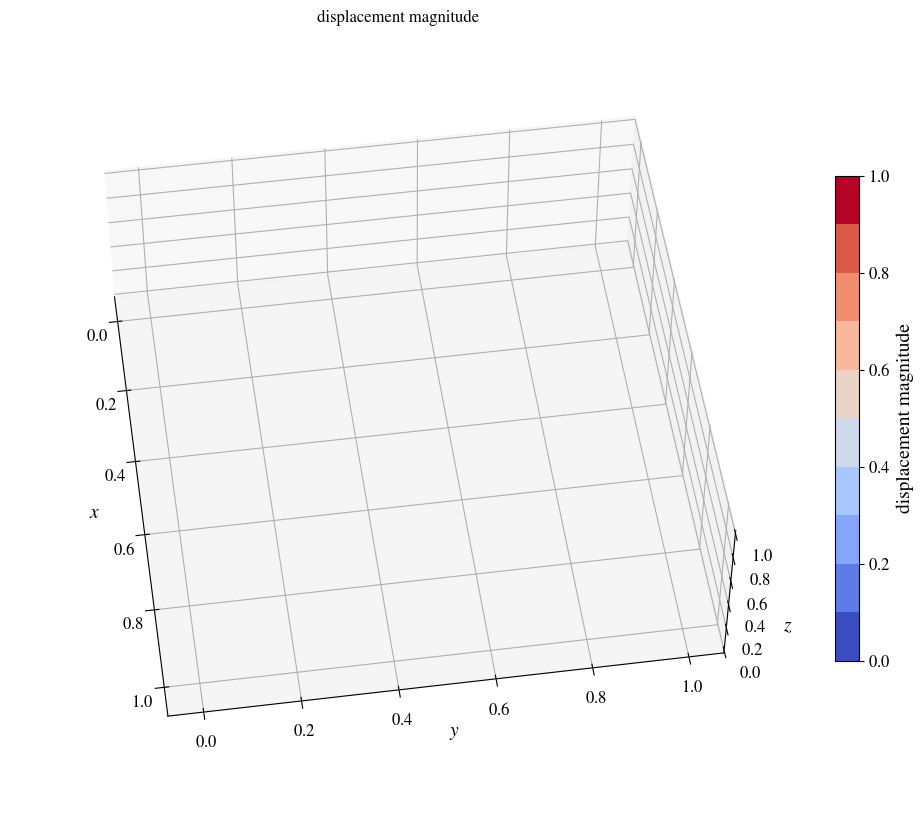

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

cmap = plt.get_cmap('coolwarm', 10)
p = ax.scatter(*positions, c=disp_mag, s=10, cmap=cmap)

# Meta.
ax.set_box_aspect((np.ptp(positions[0]), np.ptp(positions[1]), np.ptp(positions[2])))  
ax.view_init(elev=50, azim=-8)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')
ax.set_title('displacement magnitude')

# Coorbar.
fig.colorbar(p, orientation='vertical', label="displacement magnitude", shrink=0.5)

fig.tight_layout()

In [ ]:
import sympy as sym

In [ ]:
def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

sym.simplify(Jacobian(['t'], ['(a/1.5)*(1.5 - (cos(1.5*(t - pi / 6)))^2) *cos(t)','(a/1.5)*(1.5 - (cos(1.5*(t - pi / 6)))^2) *sin(t)']))

Matrix([
[ a*(0.666666666666667*(0.5*sin(3.0*t) - 1.0)*sin(t) - 0.5*cos(2.0*t) - 0.5*cos(4.0*t))],
[a*(-0.666666666666667*(0.5*sin(3.0*t) - 1.0)*cos(t) + 0.5*sin(2.0*t) - 0.5*sin(4.0*t))]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(t, A):
    A /=1.5
    return A*(1.5 - (np.cos(1.5*(t - np.pi / 6)))**2) *np.cos(t),A*(1.5 - (np.cos(1.5*(t - np.pi / 6)))**2) *np.sin(t)

0.4502383564801899 -0.1850450251351191
-0.4502433803873717 -0.18339415647561694


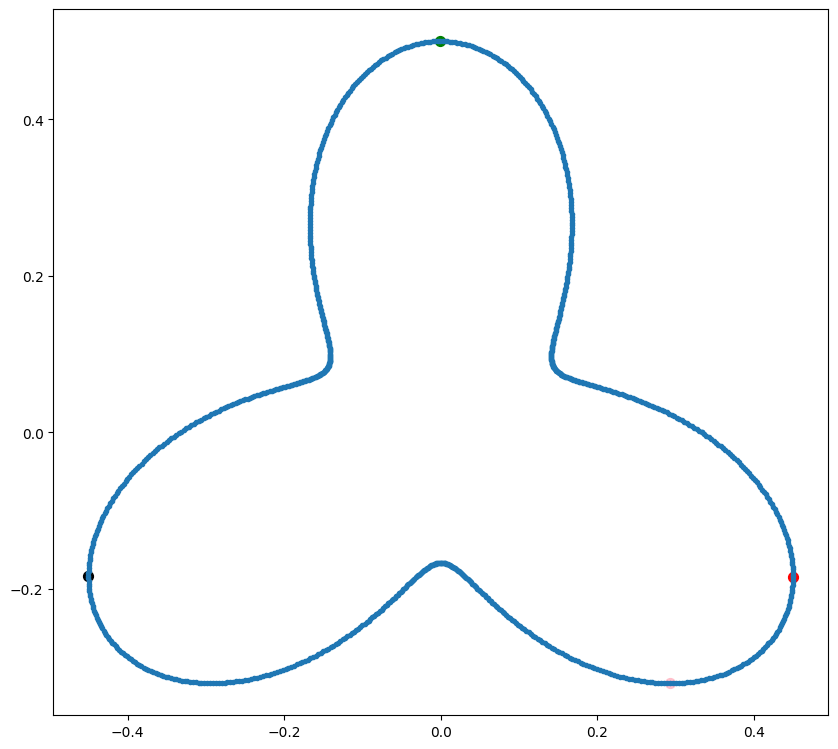

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ts  =np.linspace(0, 2 * np.pi, 1000)

x = f(ts, 0.5)[0]
y = f(ts, 0.5)[1]
ax.plot(x, y, '.')
idx = np.argmax(x)
print(x[idx],y[idx])
ax.scatter(x[idx], y[idx],c='r', s=50)
idx = np.argmin(x)
print(x[idx],y[idx])
ax.scatter(x[idx], y[idx],c='k', s=50)
idx = np.argmax(y)
ax.scatter(x[idx], y[idx],c='g', s=50)
idx = np.argmin(y)
ax.scatter(x[idx], y[idx],c='pink', s=50)
ax.set_aspect('equal')

In [ ]:
f(3.52912, 0.5)

(-0.4502438669707397, -0.18377486665692347)

In [ ]:
def f(t, the, A):
    the= 0
    radius  = A*(1.5 - (np.cos(1.5*(t - np.pi / 6)))**2 * the * (np.pi - the)/3)
    return radius * np.cos(t)*np.sin(the),radius * np.sin(t) * np.sin(the), radius * np.cos(the)

In [ ]:
def flatten_comprehension(matrix):
    return [item for row in matrix for item in row]

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

# setting up a parametric curve
phis = np.linspace(0, 2*np.pi, 100)
thetas = np.linspace(0, np.pi, 100)
x = [f(phis, t, 0.5)[0] for t in thetas]
y = [f(phis, t, 0.5)[1] for t in thetas]
z = [f(phis, t, 0.5)[2] for t in thetas]

x = flatten_comprehension(x)
y = flatten_comprehension(y)
z = flatten_comprehension(z)

ax.scatter(x, y, z)

ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_zlabel("Z label")

plt.show()


In [ ]:
# To run interactive plot.
from matplotlib import interactive
interactive(True)
%matplotlib qt


In [ ]:
def Jacobian(v_str, f_list):
    vars = sym.symbols(v_str)
    f = sym.sympify(f_list)
    J = sym.zeros(len(f),len(vars))
    for i, fi in enumerate(f):
        for j, s in enumerate(vars):
            J[i,j] = sym.diff(fi, s)
    return J

# Jacobian(['t', 'the'], ['A*(1.5 - (cos(1.5*(t - pi / 6)))^2) *cos(t)','A*(1.5 - (cos(1.5*(t - pi / 6)))^2) *sin(t)'])
# Jacobian(['t', 'u'], ['A*(1.5 - (cos(1.5*(t - pi / 6)))^2 * u * (pi - u)/3) *cos(t)* sin(u)','A*(1.5 - (cos(1.5*(t - pi / 6)))^2 * u * (pi - u)/3) *sin(t)*sin(u)','A*(1.5 - (cos(1.5*(t - pi / 6))^2 * u * (pi - u)/3)) * cos(u)'])
sym.simplify(Jacobian(['t', 'u'], ['A*(1.5 - (cos(1.5*(t - pi / 6)))^2 * u * (pi - u)/3) *cos(t)* sin(u)','A*(1.5 - (cos(1.5*(t - pi / 6)))^2 * u * (pi - u)/3) *sin(t)*sin(u)','A*(1.5 - (cos(1.5*(t - pi / 6))^2 * u * (pi - u)/3)) * cos(u)']))

Matrix([
[ A*(1.5*u*(u - pi)*(cos(2.0*t) + cos(4.0*t)) - (u*(u - pi)*(sin(3.0*t) + 1) + 9.0)*sin(t))*sin(u)/6, A*((2*u - pi)*(sin(3.0*t) + 1)*sin(u) + (u*(u - pi)*(sin(3.0*t) + 1) + 9.0)*cos(u))*cos(t)/6],
[A*(-1.5*u*(u - pi)*(sin(2.0*t) - sin(4.0*t)) + (u*(u - pi)*(sin(3.0*t) + 1) + 9.0)*cos(t))*sin(u)/6, A*((2*u - pi)*(sin(3.0*t) + 1)*sin(u) + (u*(u - pi)*(sin(3.0*t) + 1) + 9.0)*cos(u))*sin(t)/6],
[                                                0.25*A*u*(u - pi)*(cos(3.0*t - u) + cos(3.0*t + u)),        A*((2*u - pi)*(sin(3.0*t) + 1)*cos(u) - (u*(u - pi)*(sin(3.0*t) + 1) + 9.0)*sin(u))/6]])

In [30]:
import h5py as h5
import matplotlib.pyplot as plt

In [35]:
file = '../data/test.h5'
# Import data.
data = h5.File(file)

varbox_positions = data['domain/pos'][:]
varbox_normals = data['domain/normals'][:]
varbox_types = data['domain/types'][:]
# Close file.
data.close()

In [32]:
# To run interactive plot.
from matplotlib import interactive
interactive(True)
%matplotlib qt

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))

ax.scatter(*varbox_positions, s=20, facecolors='none', edgecolors='r')
# ax.scatter(*box_positions, s=5, c='k')
ax.set_aspect('equal')

for i in range(len(varbox_types)):
    ax.text(varbox_positions[0][i], varbox_positions[1][i], i)
plt.show()